In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=10, suppress=True)
from scipy import stats

from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
def miss_val_fixer(data):
    imp = SimpleImputer(missing_values=np.nan,strategy='mean',verbose=0)
    imp = imp.fit(data)
    fixed_data = imp.transform(data)
    return fixed_data

def standardize(train,valid):
    scaler = StandardScaler()
    std_train = scaler.fit_transform(train)
    std_valid = scaler.transform(valid)
    return std_train,std_valid

In [16]:

# Tal old dataset
dataset = pd.read_csv("Tal_olddd_dataset.csv",low_memory=False)
dataset = miss_val_fixer(dataset)

data = dataset[:,3:]
train_set, test_set = train_test_split(data, test_size=0.25, random_state=42)


tal_X, tal_tst_X = standardize(train_set[:,:-1],test_set[:,:-1])
tal_Y = train_set[:,-1]
tal_tst_Y = test_set[:,-1]

In [17]:
nn_tal = tf.keras.models.Sequential([
    #layers.Dense(1000, activation="relu",kernel_regularizer=l2(0.0001),input_shape = tal_X.shape),#kernel_initializer="he_normal"
    layers.Dense(500, activation="relu", kernel_regularizer=l2(0.0001),input_shape = tal_X.shape),#kernel_regularizer=l2(0.0001)),#kernel_initializer="he_normal"
    layers.Dense(200, activation="relu", kernel_regularizer=l2(0.0001)),#input_shape = metlin_X.shape[1:],kernel_regularizer=l2(0.0001)),#kernel_initializer="he_normal"
    layers.Dense(100, activation="relu", kernel_regularizer=l2(0.0001)),#input_shape = metlin_X.shape[1:],kernel_regularizer=l2(0.0001)),#kernel_initializer="he_normal"
    layers.Dense(50 , activation="relu", kernel_regularizer=l2(0.0001)),
    layers.Dense(1)])

In [18]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
nn_tal.compile(loss="mean_squared_error", optimizer=opt)
history_nn_tal = nn_tal.fit(tal_X, tal_Y, validation_data=(tal_tst_X,tal_tst_Y),epochs=20,batch_size=35,shuffle=True)

Epoch 1/20
1716/1716 [==============================] - 6s 3ms/step - loss: 87508.6406 - val_loss: 40068.9180
Epoch 2/20
1716/1716 [==============================] - 5s 3ms/step - loss: 38055.3164 - val_loss: 39648.2109
Epoch 3/20
1716/1716 [==============================] - 5s 3ms/step - loss: 36572.0000 - val_loss: 38512.1367
Epoch 4/20
1716/1716 [==============================] - 6s 3ms/step - loss: 35605.1250 - val_loss: 38164.4141
Epoch 5/20
1716/1716 [==============================] - 6s 4ms/step - loss: 34878.7383 - val_loss: 37900.1094
Epoch 6/20
1716/1716 [==============================] - 6s 3ms/step - loss: 34343.4766 - val_loss: 37855.6133
Epoch 7/20
1716/1716 [==============================] - 6s 3ms/step - loss: 33723.9883 - val_loss: 37969.0508
Epoch 8/20
1716/1716 [==============================] - 6s 3ms/step - loss: 33239.1445 - val_loss: 37881.7852
Epoch 9/20
1716/1716 [==============================] - 6s 3ms/step - loss: 32786.0430 - val_loss: 37643.3828
Epoch 10/2

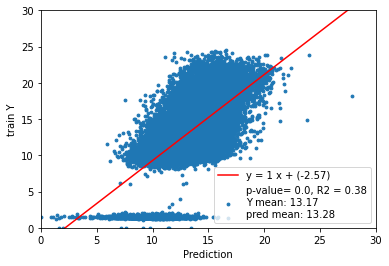

In [19]:
e = nn_tal.predict(tal_X)/60.
f = np.reshape(tal_Y,(60026,1))/60.
slope_cn, intcept_cn, rval_cn, pval_cn, stderr_cn= stats.mstats.linregress(e,f)
x_cn = range(0,30)
y_cn = slope_cn * x_cn + intcept_cn
labl_cn ='y = '+str(round(slope_cn))+' x + ('+str(round(intcept_cn,2))+')'
plt.plot(x_cn,y_cn, color='red', label=labl_cn)
plt.xlim([0,30])
plt.ylim([0,30])
plt.scatter(e,f,s=8,label='p-value= '+str(pval_cn)+", R2 = "+str(round(rval_cn**2,2))+'\n'+'Y mean: '+str(round(f.mean(),2))+'\npred mean: '+str(round(e.mean(),2)))
plt.xlabel("Prediction")
plt.ylabel("train Y")
plt.legend()
plt.show()

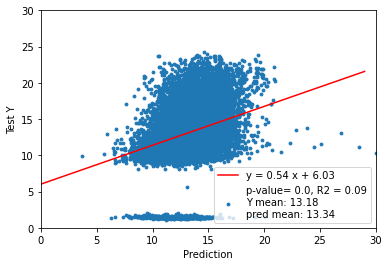

In [20]:
g = nn_tal.predict(tal_tst_X)/60.
h = np.reshape(tal_tst_Y,(20009,1))/60.
slope_tcn, intcept_tcn, rval_tcn, pval_tcn, stderr_tcn= stats.mstats.linregress(g,h)
x_tcn = range(0,30)
y_tcn = slope_tcn * x_tcn + intcept_tcn
labl_tcn ='y = '+str(round(slope_tcn,2))+' x + '+str(round(intcept_tcn,2))
plt.plot(x_tcn,y_tcn, color='red',label=labl_tcn)
plt.xlim([0,30])
plt.ylim([0,30])
plt.scatter(g,h,s=8,label='p-value= '+str(pval_tcn)+", R2 = "+str(round(rval_tcn**2,2))+'\n'+'Y mean: '+str(round(h.mean(),2))+'\npred mean: '+str(round(g.mean(),2)))
plt.xlabel("Prediction")
plt.ylabel("Test Y")
plt.legend()
plt.show()

In [21]:
# dataset
small_dataset = pd.read_csv("Tal_smalll_dataset.csv",low_memory=False)
small_dataset = small_dataset.drop("NAME", axis=1)
small_dataset = miss_val_fixer(small_dataset)
#small_dataset.to_numpy()
small_data = small_dataset[:,2:]
small_train_set, small_test_set = train_test_split(small_data, test_size=0.25, random_state=42)


small_tal_X, small_tal_tst_X = standardize(small_train_set[:,:-1],small_test_set[:,:-1])
small_tal_Y = small_train_set[:,-1]
small_tal_tst_Y = small_test_set[:,-1]

In [22]:
nn_small_tal = tf.keras.models.Sequential([
    layers.Dense(500, activation="relu", kernel_regularizer=l2(0.0001),input_shape = small_tal_X.shape),#input_shape = metlin_X.shape[1:],kernel_regularizer=l2(0.0001)),#kernel_initializer="he_normal"
    layers.Dense(200, activation="relu", kernel_regularizer=l2(0.0001)),#input_shape = metlin_X.shape[1:],kernel_regularizer=l2(0.0001)),#kernel_initializer="he_normal"
    layers.Dense(100, activation="relu", kernel_regularizer=l2(0.0001)),#input_shape = metlin_X.shape[1:],kernel_regularizer=l2(0.0001)),#kernel_initializer="he_normal"
    layers.Dense(1)])


In [23]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
nn_small_tal.compile(loss="mean_squared_error", optimizer=opt)
history_nn_small_tal = nn_small_tal.fit(small_tal_X, small_tal_Y, validation_data=(small_tal_tst_X,small_tal_tst_Y),epochs=20,batch_size=35,shuffle=True)

Epoch 1/20
12/12 [==============================] - 0s 10ms/step - loss: 6.7686 - val_loss: 4.1245
Epoch 2/20
12/12 [==============================] - 0s 4ms/step - loss: 2.1919 - val_loss: 2.3777
Epoch 3/20
12/12 [==============================] - 0s 4ms/step - loss: 1.8199 - val_loss: 2.0698
Epoch 4/20
12/12 [==============================] - 0s 4ms/step - loss: 1.2103 - val_loss: 1.7823
Epoch 5/20
12/12 [==============================] - 0s 4ms/step - loss: 1.2881 - val_loss: 1.4157
Epoch 6/20
12/12 [==============================] - 0s 4ms/step - loss: 1.2916 - val_loss: 1.6083
Epoch 7/20
12/12 [==============================] - 0s 4ms/step - loss: 0.9027 - val_loss: 1.3724
Epoch 8/20
12/12 [==============================] - 0s 4ms/step - loss: 0.5662 - val_loss: 1.3770
Epoch 9/20
12/12 [==============================] - 0s 4ms/step - loss: 0.6162 - val_loss: 1.2913
Epoch 10/20
12/12 [==============================] - 0s 4ms/step - loss: 0.5954 - val_loss: 1.3226
Epoch 11/20
12/12 

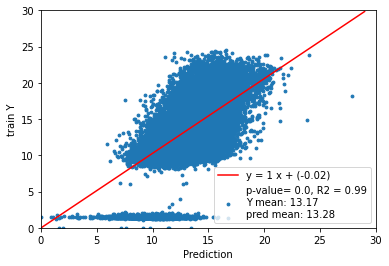

In [24]:
a = nn_small_tal.predict(small_tal_X)
b = np.reshape(small_tal_Y,(399,1))
slope_cn, intcept_cn, rval_cn, pval_cn, stderr_cn= stats.mstats.linregress(a,b)
x_cn = range(0,30)
y_cn = slope_cn * x_cn + intcept_cn
labl_cn ='y = '+str(round(slope_cn))+' x + ('+str(round(intcept_cn,2))+')'
plt.plot(x_cn,y_cn, color='red', label=labl_cn)
plt.xlim([0,30])
plt.ylim([0,30])
plt.scatter(e,f,s=8,label='p-value= '+str(pval_cn)+", R2 = "+str(round(rval_cn**2,2))+'\n'+'Y mean: '+str(round(f.mean(),2))+'\npred mean: '+str(round(e.mean(),2)))
plt.xlabel("Prediction")
plt.ylabel("train Y")
plt.legend()
plt.show()

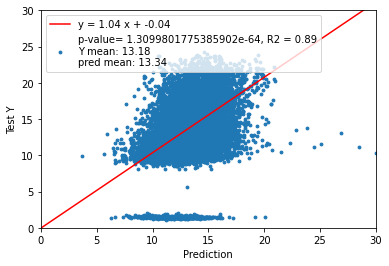

In [25]:
c = nn_small_tal.predict(small_tal_tst_X)
d = np.reshape(small_tal_tst_Y,(134,1))
slope_tcn, intcept_tcn, rval_tcn, pval_tcn, stderr_tcn= stats.mstats.linregress(c,d)
x_tcn = range(0,30)
y_tcn = slope_tcn * x_tcn + intcept_tcn
labl_tcn ='y = '+str(round(slope_tcn,2))+' x + '+str(round(intcept_tcn,2))
plt.plot(x_tcn,y_tcn, color='red',label=labl_tcn)
plt.xlim([0,30])
plt.ylim([0,30])
plt.scatter(g,h,s=8,label='p-value= '+str(pval_tcn)+", R2 = "+str(round(rval_tcn**2,2))+'\n'+'Y mean: '+str(round(h.mean(),2))+'\npred mean: '+str(round(g.mean(),2)))
plt.xlabel("Prediction")
plt.ylabel("Test Y")
plt.legend()
plt.show()

In [26]:
nn_tal.save("nn_tal.h5")

In [27]:
tal_X.shape

(60026, 1567)

In [28]:
old_tal_model = keras.models.load_model("nn_tal.h5")
old_on_small = keras.models.Sequential(old_tal_model.layers[:-1])
old_on_small.add(keras.layers.Dense(1, activation="relu"))#,input_shape = tal_X.shape[1:]))
small_input = keras.Input(shape=(small_tal_X.shape[1:]))
old_clone = keras.models.clone_model(old_tal_model,input_tensors = small_input)
old_clone.set_weights(old_tal_model.get_weights())

In [29]:
for layer in old_on_small.layers[:-1]:
    layer.trainable = False
old_on_small.compile(loss="mean_squared_error", optimizer="adam")

history_1 = old_on_small.fit(small_tal_X, small_tal_Y, epochs=4, validation_data=(small_tal_tst_X, small_tal_tst_Y))

Epoch 1/4
13/13 [==============================] - 0s 8ms/step - loss: 6873.5835 - val_loss: 4597.9609
Epoch 2/4
13/13 [==============================] - 0s 2ms/step - loss: 2211.3201 - val_loss: 1063.3550
Epoch 3/4
13/13 [==============================] - 0s 2ms/step - loss: 390.0253 - val_loss: 75.1858
Epoch 4/4
13/13 [==============================] - 0s 2ms/step - loss: 26.5405 - val_loss: 21.8461


In [30]:
for layer in old_on_small.layers[:-1]:
    layer.trainable = True
    
#optimizer = keras.optimizers.SGD(lr=1e-4) # the default lr is 1e-2
opt = tf.keras.optimizers.Adam(learning_rate=0.00001)
old_on_small.compile(loss="mean_squared_error", optimizer=opt)
history_2 = old_on_small.fit(small_tal_X, small_tal_Y, epochs=50, validation_data=(small_tal_tst_X, small_tal_tst_Y))

Epoch 1/50
13/13 [==============================] - 0s 10ms/step - loss: 16.5907 - val_loss: 16.5936
Epoch 2/50
13/13 [==============================] - 0s 4ms/step - loss: 12.8539 - val_loss: 14.6542
Epoch 3/50
13/13 [==============================] - 0s 4ms/step - loss: 10.7075 - val_loss: 12.1879
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 9.1620 - val_loss: 10.6443
Epoch 5/50
13/13 [==============================] - 0s 4ms/step - loss: 7.9040 - val_loss: 9.3621
Epoch 6/50
13/13 [==============================] - 0s 4ms/step - loss: 6.9375 - val_loss: 8.4119
Epoch 7/50
13/13 [==============================] - 0s 4ms/step - loss: 6.1689 - val_loss: 7.5630
Epoch 8/50
13/13 [==============================] - 0s 4ms/step - loss: 5.5118 - val_loss: 6.9281
Epoch 9/50
13/13 [==============================] - 0s 4ms/step - loss: 4.7194 - val_loss: 6.3983
Epoch 10/50
13/13 [==============================] - 0s 4ms/step - loss: 4.1323 - val_loss: 6.1247
Epoch 11/50

In [31]:
old_on_small.evaluate(small_tal_tst_X, small_tal_tst_Y)

5/5 [==============================] - 0s 1ms/step - loss: 3.1373


3.1372876167297363

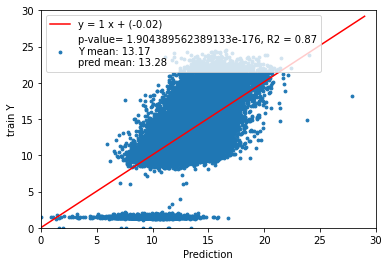

In [32]:
i = old_on_small.predict(small_tal_X)
j = np.reshape(small_tal_Y,(399,1))
slope_cn, intcept_cn, rval_cn, pval_cn, stderr_cn= stats.mstats.linregress(i,j)
x_cn = range(0,30)
y_cn = slope_cn * x_cn + intcept_cn
#labl_cn ='y = '+str(round(slope_cn))+' x + ('+str(round(intcept_cn,2))+')'
plt.plot(x_cn,y_cn, color='red', label=labl_cn)
plt.xlim([0,30])
plt.ylim([0,30])
plt.scatter(e,f,s=8,label='p-value= '+str(pval_cn)+", R2 = "+str(round(rval_cn**2,2))+'\n'+'Y mean: '+str(round(f.mean(),2))+'\npred mean: '+str(round(e.mean(),2)))
plt.xlabel("Prediction")
plt.ylabel("train Y")
plt.legend()
plt.show()

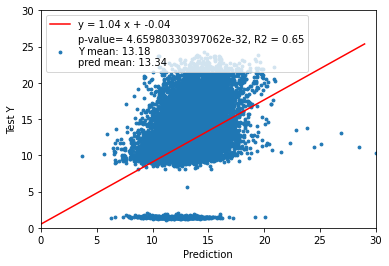

In [33]:
k = old_on_small.predict(small_tal_tst_X)
l = np.reshape(small_tal_tst_Y,(134,1))
slope_tcn, intcept_tcn, rval_tcn, pval_tcn, stderr_tcn= stats.mstats.linregress(k,l)
x_tcn = range(0,30)
y_tcn = slope_tcn * x_tcn + intcept_tcn
#
labl_tcn ='y = '+str(round(slope_tcn,2))+' x + '+str(round(intcept_tcn,2))
plt.plot(x_tcn,y_tcn, color='red',label=labl_tcn)
plt.xlim([0,30])
plt.ylim([0,30])
plt.scatter(g,h,s=8,label='p-value= '+str(pval_tcn)+", R2 = "+str(round(rval_tcn**2,2))+'\n'+'Y mean: '+str(round(h.mean(),2))+'\npred mean: '+str(round(g.mean(),2)))
plt.xlabel("Prediction")
plt.ylabel("Test Y")
plt.legend()
plt.show()